# ECONOMETRICS - ASSIGNMENT ON REGRESSION ANALYSIS

# Nehla Shajahan | MOR: Sem 2 | South Campus | Roll no: 20/1613

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from statsmodels.compat import lzip
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
sns.set()

### Loading the raw data

In [2]:
data = pd.read_csv('countries of the world.csv')
data.head(10) #displaying the first 10 rows of the given dataset

,Country,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Birthrate,Deathrate,GDP ($ per capita)
0,Afghanistan,163.07,36.0,3.2,46.60,20.34,700
1,Albania,21.52,86.5,71.2,15.11,5.22,4500
2,Algeria,31.00,70.0,78.1,17.14,4.61,6000
3,Angola,191.19,42.0,7.8,45.11,24.20,1900
4,Anguilla,21.03,95.0,460.0,14.17,5.34,8600
5,Antigua & Barbuda,19.46,89.0,549.9,16.93,5.37,11000
6,Argentina,15.18,97.1,220.4,16.73,7.55,11200
7,Armenia,23.28,98.6,195.7,12.07,8.23,3500
8,Aruba,5.89,97.0,516.1,11.03,6.68,28000
9,Australia,4.69,100.0,565.5,12.14,7.51,29000















## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
data.describe(include='all')

,Country,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Birthrate,Deathrate,GDP ($ per capita)
count,194,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
unique,194,NaN,NaN,NaN,NaN,NaN,NaN
top,Australia,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.678351,82.164948,212.639691,22.703711,9.557732,9451.546392
std,NaN,36.622435,19.895869,209.254387,11.359592,5.194357,10142.514158
min,NaN,2.290000,17.600000,0.200000,7.290000,2.410000,500.000000
25%,NaN,8.987500,70.100000,28.250000,13.347500,5.880000,1825.000000
50%,NaN,24.245000,90.950000,140.350000,19.320000,8.215000,5400.000000
75%,NaN,62.575000,97.975000,339.600000,30.865000,11.715000,13700.000000


### Determining the variables of interest by dropping the categorical 'Country' column

In [4]:
data=data.drop(['Country'],axis=1)

### Dealing with missing values

In [5]:
data.isnull().sum()

Infant mortality (per 1000 births)    0
Literacy (%)                          0
Phones (per 1000)                     0
Birthrate                             0
Deathrate                             0
GDP ($ per capita)                    0
dtype: int64

Hence, the dataset under consideration has no missing values.

## Checking the OLS assumptions 

### Linearity

<div class="alert alert-block alert-success">
Linearity means that the mean of the response variable is a linear combination of the parameters (regression coefficients) and the predictor variables or in other words, the relationship between x(independent features) and the mean of y(dependent feature) is linear. We check for this assumption using a scatter plot.
</div>

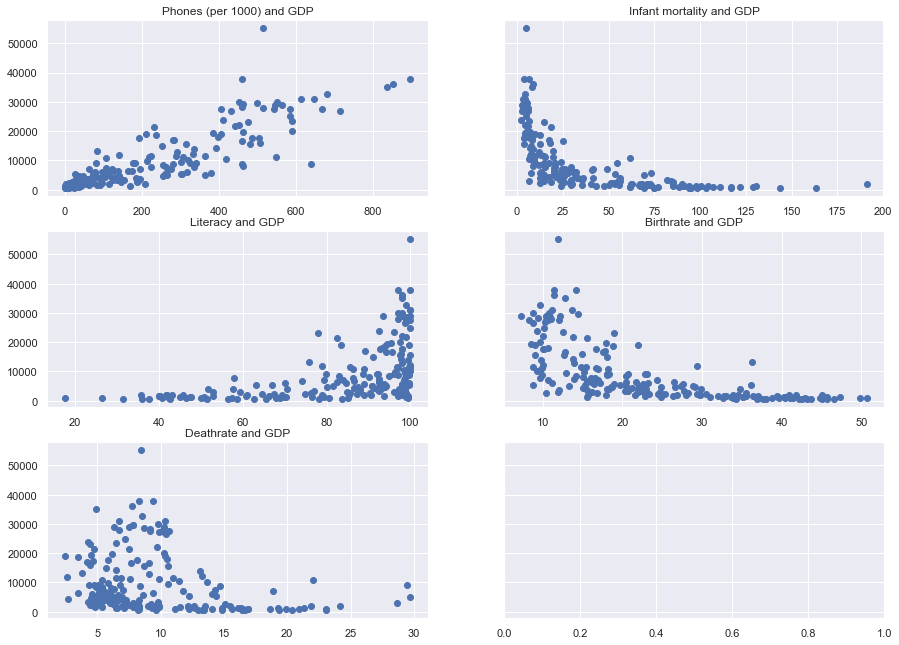

In [6]:
#Plotting a scatter plot to check for linearity between the features
f, (ax1, ax2, ax3) = plt.subplots(3, 2, sharey=True, figsize =(15,11))

ax1[0].scatter(data['Phones (per 1000)'],data['GDP ($ per capita)'])
ax1[0].set_title('Phones (per 1000) and GDP')
ax1[1].scatter(data['Infant mortality (per 1000 births)'],data['GDP ($ per capita)'])
ax1[1].set_title('Infant mortality and GDP')
ax2[0].scatter(data['Literacy (%)'],data['GDP ($ per capita)'])
ax2[0].set_title('Literacy and GDP')
ax2[1].scatter(data['Birthrate'],data['GDP ($ per capita)'])
ax2[1].set_title('Birthrate and GDP')
ax3[0].scatter(data['Deathrate'],data['GDP ($ per capita)'])
ax3[0].set_title('Deathrate and GDP')


plt.show()

<div class="alert alert-block alert-warning">
Here, we can see that most of the features are not showing a linear relationship with our dependent variable, GDP. To overcome this problem, we use log transformation on 'GDP' and will plot the scatter plot again.
   </div>

### Applying log transformation


In [7]:
GDP = np.log(data['GDP ($ per capita)']).round(2)
data['GDP ($ per capita)'] = GDP

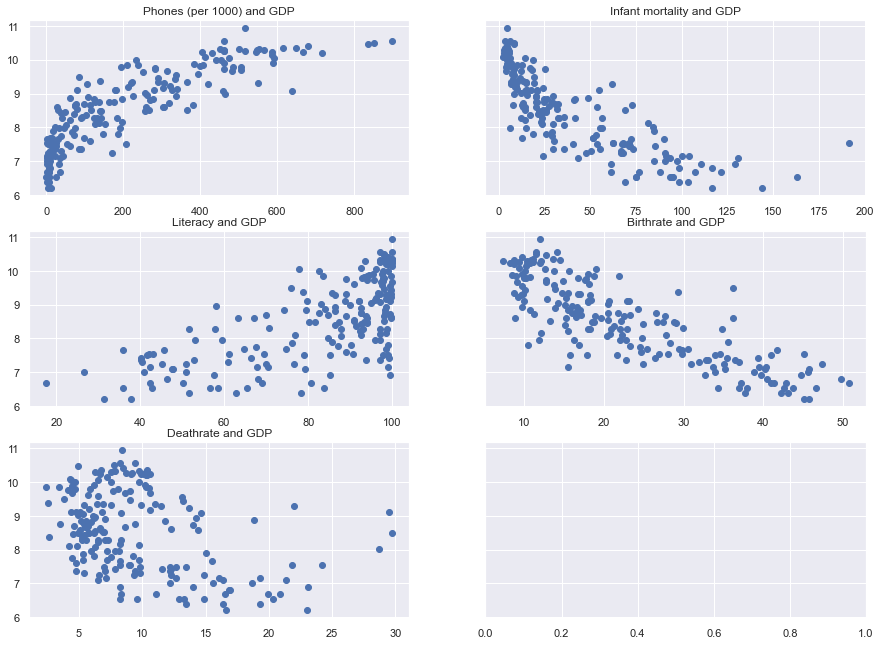

In [8]:
f, (ax1, ax2, ax3) = plt.subplots(3, 2, sharey=True, figsize =(15,11))

ax1[0].scatter(data['Phones (per 1000)'],data['GDP ($ per capita)'])
ax1[0].set_title('Phones (per 1000) and GDP')
ax1[1].scatter(data['Infant mortality (per 1000 births)'],data['GDP ($ per capita)'])
ax1[1].set_title('Infant mortality and GDP')
ax2[0].scatter(data['Literacy (%)'],data['GDP ($ per capita)'])
ax2[0].set_title('Literacy and GDP')
ax2[1].scatter(data['Birthrate'],data['GDP ($ per capita)'])
ax2[1].set_title('Birthrate and GDP')
ax3[0].scatter(data['Deathrate'],data['GDP ($ per capita)'])
ax3[0].set_title('Deathrate and GDP')


plt.show()

<div class="alert alert-block alert-success">
    <h5>
   Now, evidently there is a linear relationship between all the dependent features and the independent feature, GDP.
    </h5>
        </div>
    

## Multicollinearity

<div class="alert alert-block alert-success">
Multicollinearity is a condition in which the independent variables are highly correlated with each other. In regression analysis, we assume that there is no multicollinearity between the features. To check for this condition we use, the varianle inflation factor. If VIF > 10, there is multicollinearity.
 </div>   

In [9]:
data.columns #to display the columns in our dataset

Index(['Infant mortality (per 1000 births)', 'Literacy (%)',
       'Phones (per 1000)', 'Birthrate', 'Deathrate', 'GDP ($ per capita)'],
      dtype='object')

### Checking for multicollinearity using variable inflation factor

In [10]:
variables = data[['Infant mortality (per 1000 births)', 'Literacy (%)',
       'Phones (per 1000)', 'Birthrate', 'Deathrate' ]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [11]:
vif

,VIF,features
0,15.353567,Infant mortality (per 1000 births)
1,11.257480,Literacy (%)
2,4.290512,Phones (per 1000)
3,16.235823,Birthrate
4,9.377861,Deathrate


<div class="alert alert-block alert-warning">
This indicates the presence of multicollinearity amongst the features. To overcome this, we standardize the features. Standardization refers to the process of subtracting the mean and dividing by the standard deviation. Centering the variables and standardizing them will both reduce the multicollinearity. However, standardizing changes the interpretation of the coefficients. So, we will be centering the features in this case.
    </div>

### Scaling the data

In [12]:
mean_data=data[['Infant mortality (per 1000 births)', 'Literacy (%)',
       'Phones (per 1000)', 'Birthrate', 'Deathrate']].mean()  #calculated the mean

data[['Infant mortality (per 1000 births)', 'Literacy (%)',#subtracting the mean from the required values to center the features
       'Phones (per 1000)', 'Birthrate', 'Deathrate']]=data[['Infant mortality (per 1000 births)', 'Literacy (%)',
       'Phones (per 1000)', 'Birthrate', 'Deathrate']]-mean_data                                                         

### Checking for multicollinearity again

In [13]:
variables = data[['Infant mortality (per 1000 births)', 'Literacy (%)',
       'Phones (per 1000)', 'Birthrate', 'Deathrate' ]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns


vif

,VIF,features
0,7.271468,Infant mortality (per 1000 births)
1,2.879712,Literacy (%)
2,2.346476,Phones (per 1000)
3,5.596529,Birthrate
4,2.144280,Deathrate


<div class="alert alert-block alert-success">
    <h5>
Since, the general rule of thumb is if a VIF is > 10, there is high multicollinearity. All our values in the above table are in the optimal range i.e. below 10. Hence, we have succesfully dealt with the multicollinearity present in our dataset.
    </h5>
     </div> 

### Declaring the dependent and independent features.

In [14]:
x=data.drop(['GDP ($ per capita)'],axis=1) #dropping our target variable from the features
y=data.iloc[:,-1] #assigning 'GDP' as y

## Auto-correlation

<div class="alert alert-block alert-success">
Autocorrelation occurs when the residuals(actual-predicted) are not independent from each other. To test for auto-correlation, we take the help of the Durbin-Watson test. A 'statsmodel' summary table will give us a comprehensive summary analysis and the required Durbin-Watson test value.
     </div>

### Statsmodel summary table to find out Durbin-Watson test value

In [15]:
from statsmodels.formula.api import ols
model=ols('y~x',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           1.14e-71
Time:                        23:11:03   Log-Likelihood:                -133.38
No. Observations:                 194   AIC:                             278.8
Df Residuals:                     188   BIC:                             298.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.5342      0.035    243.164      0.000       8.465       8.603
x[0]          -0.0124      0.003     -4.798      0.000      -0.018      -0.007
x[1]          -0.0018      0.003     -0.607      0.544      -0.008       0.004
x[2]           0.0027      0.000     10.369      0.000       0.002       0.003
x[3]          -0.0230      0.007     -3.141      0.002      -0.037      -0.009
x[4]           0.0217      0.010      2.192      0.030       0.002       0.041
==============================================================================
Omnibus:                        4.040   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                3.787
Skew:                           0.243   Prob(JB):                        0.151
Kurtosis:                       3.481   Cond. No.                         211.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-success">
<h5>
    The Durbin-Watson test value (1.883) is very close to 2 which indicates there is no autocorrelation present in the dataset.
</h5>
    </div>

## Heteroscedasticity

<div class="alert alert-block alert-success">
Heteroscedasticity or non-constant variance occurs if if the variability of the random disturbance is unequal across elements of the vector. Here, we will be using Goldfeld Quandt test to look for heteroscedasticity.
<h5>
* Null hypothesis,      H0 : Homoscedasticity or Absence of heteroscedasticity ; 
* Alternate hypothesis,  H1 : Presence of heteroscedasticity
    </h5>
 </div>

In [16]:
#testing for Heteroscedasticity 
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

[('F statistic', 1.0414928918546058), ('p-value', 0.42333299359456456)]

<div class="alert alert-block alert-success">
For any hypothesis test, the decision rule is:

* If p-value < level of significance (alpha); then null hypothesis is rejected.
* If p-value > level of significance (alpha); then we fail to reject the null hypothesis.
    </div>

<div class="alert alert-block alert-success">
<h5>
    Here, our p value > 0.05, level of significance. Therefore, we fail to reject the null hypothesis. Hence, we can conclude the absence of heteroscedasticity in our dataset.
    </h5>
    </div>

# Linear regression model

## Train Test Split

In [17]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=365)

### Creating the regression using sklearn

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred = reg.predict(x_train)

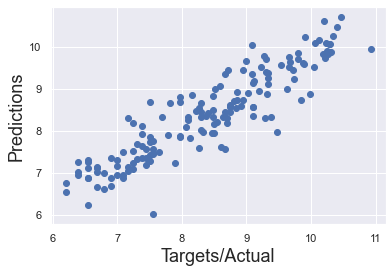

In [20]:
#plotting a scatter plot between the actual and predicted values



plt.scatter(y_train, y_pred)
plt.xlabel('Targets/Actual',size=18)
plt.ylabel('Predictions',size=18)

plt.show()

C:\Users\Nehla Shajahan\Anaconda new\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

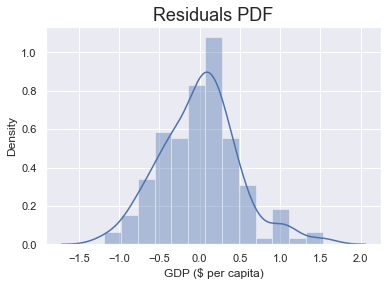

In [21]:
#To check the probability distribution of the residuals(actual-predicted)




sns.distplot(y_train - y_pred)

plt.title("Residuals PDF", size=18)

In [22]:
#To find the R squared value
print("The R squared value  is",reg.score(x_train,y_train))

The R squared value  is 0.8279425716312756


### Finding the weights and bias

In [23]:
print("The intercept of our regression model is",reg.intercept_)

The intercept of our regression model is 8.526492444345447


In [24]:
print("The bias/coefficients of our regression model is",reg.coef_)

The bias/coefficients of our regression model is [-0.0116893  -0.00206922  0.00276962 -0.02392357  0.02005003]


## Testing the model

In [25]:
y_test_pred = reg.predict(x_test)

### Finding the R squared value and MSE of the model

In [26]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

In [27]:
print('The model R squared value is:',r2_score(y_true=y_test,y_pred=y_test_pred))

The model R squared value is: 0.8090975457707839


In [28]:
print('The mean squared error is:',mean_squared_error(y_test,y_test_pred))

The mean squared error is: 0.22137500432548252


## Actual vs Predicted values : analysis

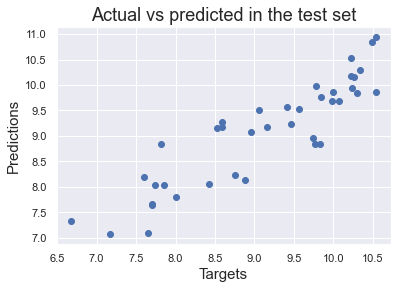

In [29]:
#Plotting a scatter plot to see the relation between actual and predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel('Targets',size=15)
plt.ylabel('Predictions',size=15)
plt.title('Actual vs predicted in the test set',size=18)
plt.show()


In [36]:
#creating a new dataframe with the actual target values and the model predicted values
df_pf = pd.DataFrame(np.exp(y_test_pred), columns=['Prediction'])
df_pf['Target'] = np.exp(y_test)

In [37]:
#some processing to get a clean dataframe
y_test = y_test.reset_index(drop=True)
y_test.head()

0   9.42
1   9.85
2   9.57
3   9.77
4   7.74
Name: GDP ($ per capita), dtype: float64

In [38]:
df_pf['Target'] = np.exp(y_test)
df_pf.head(7)

,Prediction,Target
0,14224.05,12332.58
1,17492.53,18958.35
2,13626.01,14328.42
3,6928.94,17500.77
4,3115.31,2298.47
5,51495.20,35954.16
6,9575.14,9509.06


In [39]:
#Further analysis
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [40]:
#Displaying the targets and predictions from the most accurate ones to the least accurate value.
pd.options.display.max_rows = 200
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
6,9575.14,9509.06,-66.08,0.69
7,2121.51,2208.35,86.83,3.93
29,29574.15,30946.03,1371.88,4.43
2,13626.01,14328.42,702.41,4.90
9,2099.16,2208.35,109.19,4.94
28,26293.92,27722.51,1428.59,5.15
1,17492.53,18958.35,1465.82,7.73
25,1168.44,1299.84,131.41,10.11
38,25562.90,28853.89,3290.99,11.41
24,19287.60,22026.47,2738.87,12.43
